In [122]:
import numpy as np
import pandas as pd

# Importing Data

In [123]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Asq Six Question to yourself

In [124]:
crop.shape

(2200, 8)

In [125]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [126]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [127]:
crop.duplicated().sum()

0

In [128]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [129]:
cropx = crop.drop('label',axis=1)

In [130]:
cropx.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [131]:
crop['temperature'] = cropx['temperature'].astype(int)
crop['humidity'] = cropx['humidity'].astype(int)
crop['ph'] = cropx['ph'].astype(int)
crop['rainfall'] = cropx['rainfall'].astype(int)

In [132]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20,82,6,202,rice
1,85,58,41,21,80,7,226,rice
2,60,55,44,23,82,7,263,rice
3,74,35,40,26,80,6,242,rice
4,78,42,42,20,81,7,262,rice


In [133]:
cropx['temperature'] = cropx['temperature'].astype(int)
cropx['humidity'] = cropx['humidity'].astype(int)
cropx['ph'] = cropx['ph'].astype(int)
cropx['rainfall'] = cropx['rainfall'].astype(int)

In [134]:
cropx.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20,82,6,202
1,85,58,41,21,80,7,226
2,60,55,44,23,82,7,263
3,74,35,40,26,80,6,242
4,78,42,42,20,81,7,262


# Exploring Data

In [135]:
corr = cropx.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.028001,0.190940,0.120219,0.059062
P,-0.231460,1.000000,0.736232,-0.127917,-0.118998,-0.151896,-0.063743
K,-0.140512,0.736232,1.000000,-0.161183,0.190440,-0.156045,-0.053479
temperature,0.028001,-0.127917,-0.161183,1.000000,0.205237,-0.013489,-0.029097
humidity,0.190940,-0.118998,0.190440,0.205237,1.000000,0.028404,0.094723
ph,0.120219,-0.151896,-0.156045,-0.013489,0.028404,1.000000,-0.108492
rainfall,0.059062,-0.063743,-0.053479,-0.029097,0.094723,-0.108492,1.000000


<Axes: >

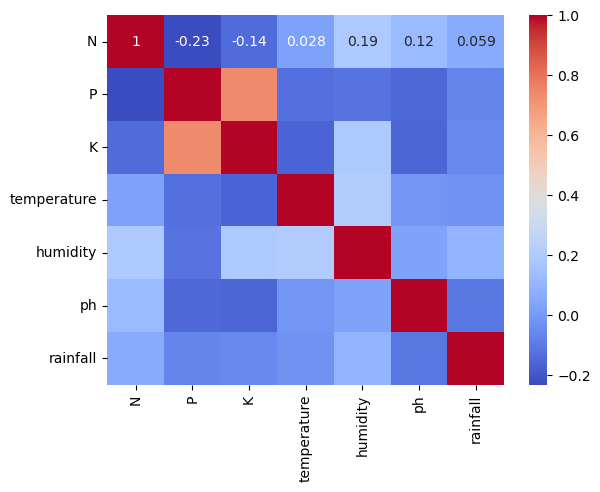

In [136]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [137]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

/var/folders/h8/t6lhv6xn2rb77q_875grd1400000gn/T/ipykernel_11821/2091051290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])
/Users/sa/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


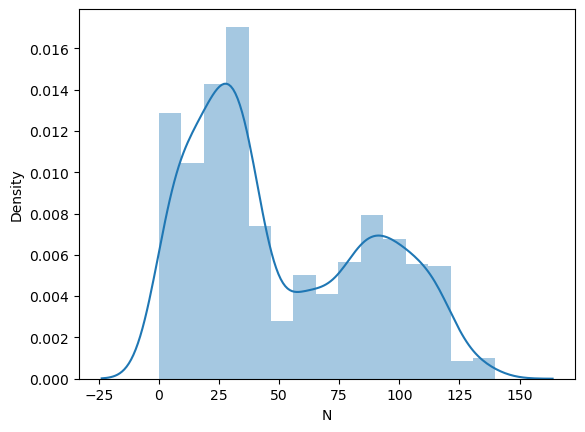

In [138]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

# Encoding

In [139]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [140]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [141]:
# crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20,82,6,202,rice,1
1,85,58,41,21,80,7,226,rice,1
2,60,55,44,23,82,7,263,rice,1
3,74,35,40,26,80,6,242,rice,1
4,78,42,42,20,81,7,262,rice,1


# Train Test Split

In [142]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [143]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20,82,6,202
1,85,58,41,21,80,7,226
2,60,55,44,23,82,7,263
3,74,35,40,26,80,6,242
4,78,42,42,20,81,7,262
...,...,...,...,...,...,...,...
2195,107,34,32,26,66,6,177
2196,99,15,27,27,56,6,127
2197,118,33,30,24,67,6,173
2198,117,32,34,26,52,6,127


In [144]:
y.shape

(2200,)

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
X_train.shape

(1760, 7)

In [148]:
X_test.shape

(440, 7)

In [149]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16,92,6,102
752,37,79,19,27,69,7,69
892,7,73,25,27,63,7,45
1041,101,70,48,25,75,6,116
1179,0,17,30,35,47,6,97
...,...,...,...,...,...,...,...
1638,10,5,5,21,91,7,112
1095,108,94,47,27,84,6,90
1130,11,36,31,27,51,6,100
1294,11,124,204,13,80,6,71



# Scale the features using MinMaxScaler

In [150]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [151]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.91764706, 0.5       ,
        0.29496403],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64705882, 0.66666667,
        0.17625899],
       [0.05      , 0.48571429, 0.1       , ..., 0.57647059, 0.66666667,
        0.08992806],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43529412, 0.5       ,
        0.28776978],
       [0.07857143, 0.85      , 0.995     , ..., 0.77647059, 0.5       ,
        0.18345324],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56470588, 0.66666667,
        0.11870504]])

# Standarization

In [152]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [153]:
X_train

array([[-0.9034266 , -1.1261617 , -0.6685066 , ...,  0.95103821,
         0.05215   , -0.00314438],
       [-0.36705134,  0.77035885, -0.57058952, ..., -0.0933726 ,
         1.25983426, -0.60388734],
       [-1.17161422,  0.58973784, -0.45308903, ..., -0.36582759,
         1.25983426, -1.04079131],
       ...,
       [-1.06433917, -0.52409169, -0.33558853, ..., -0.91073758,
         0.05215   , -0.03955305],
       [-1.06433917,  2.12501638,  3.05234239, ...,  0.40612822,
         0.05215   , -0.56747867],
       [-0.50114515,  0.74025535, -0.51183927, ..., -0.41123676,
         1.25983426, -0.89515665]])

# Training Models

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

/Users/sa/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression  with accuracy : 0.9681818181818181
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9681818181818181
K-Nearest Neighbors  with accuracy : 0.9613636363636363
Decision Tree  with accuracy : 0.975
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.9863636363636363
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9863636363636363
Extra Trees  with accuracy : 0.9272727272727272


In [155]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

# Predictive System

In [156]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [159]:
N = 90
P = 42
k = 43
temperature = 20
humidity = 82
ph = 6
rainfall = 202

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Papaya is a best crop to be cultivated 


In [158]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))